In [3]:
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd 
from sklearn.metrics import classification_report , confusion_matrix
import cifar10

In [4]:
cifar10.data_path = "data/CIFAR-10/"

In [5]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [24]:
images_train, class_train, labels_train = cifar10.load_training_data()
images_test, class_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [25]:
print(images_train.shape,class_train.shape,labels_train.shape)
print(images_test.shape,class_test.shape,labels_test.shape)

(50000, 32, 32, 3) (50000,) (50000, 10)
(10000, 32, 32, 3) (10000,) (10000, 10)


In [55]:
# RGB VALUES OF THAT PIXEL IN THAT PIC 
images_train[4][25][25]

array([0.05882353, 0.00784314, 0.00784314])

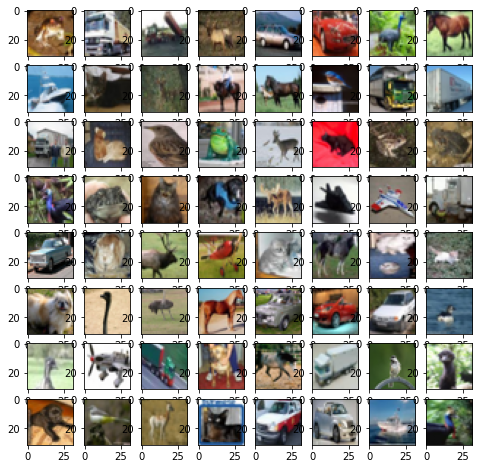

In [26]:
fig = plt.figure(figsize = ( 8 , 8 ))

for i in range(64): 
    ax2 = fig.add_subplot(8 , 8 , i+1) 
    ax2.imshow(images_train[i] , cmap = plt.cm.bone) 
plt.show()

In [27]:
# size , features

32*32*3

3072

reshaping into 2d array

In [56]:
x_train = images_train
y_train = class_train
x_train = x_train.reshape(50000,3072)
x_train.shape , y_train.shape

((50000, 3072), (50000,))

In [57]:
x_test = images_test
y_test = class_test
x_test = x_test.reshape(10000,3072)
x_test.shape , y_test.shape

((10000, 3072), (10000,))

PCA

In [58]:
pca = PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

In [59]:
pca.components_.shape , pca.explained_variance_

((3072, 3072),
 array([5.53633226e+01, 2.14265348e+01, 1.27464910e+01, ...,
        1.64690026e-06, 1.60936325e-06, 1.58719044e-06]))

optimal features

In [60]:
k = 0 
total = sum(pca.explained_variance_) 
currentsum = 0
while currentsum/total < 0.99 :  
    currentsum += pca.explained_variance_[k] 
    k += 1
print('features needed : ', k)

features needed :  658


In [61]:
pca = PCA(n_components = k , whiten = True)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca.shape , x_test_pca.shape

((50000, 658), (10000, 658))

SVM

In [66]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score


In [63]:
clf = svm.SVC() 
clf.fit(x_train_pca , y_train)

SVC()

In [67]:
y_pred = clf.predict(x_test_pca)
svm_score = accuracy_score(y_test , y_pred)
svm_score

0.4827

In [68]:
y_pred[:10]

array([3, 8, 0, 0, 4, 3, 1, 6, 5, 1])

In [70]:
img_class = [] 

for i in range(len(y_pred)):
    img_class.append(class_names[y_pred[i]])

img_class[:10]

['cat',
 'ship',
 'airplane',
 'airplane',
 'deer',
 'cat',
 'automobile',
 'frog',
 'dog',
 'automobile']

In [72]:
np.savetxt("prediction.csv" , img_class , fmt = '%s')